In [10]:
# Cell 0 - Preparation: load packages, set some basic options  
%matplotlib inline
from matplotlib import rcParams
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 7
rcParams["figure.subplot.hspace"] = (0.5)

## Funciones de filtrado

In [49]:
from scipy.fftpack import hilbert
from scipy.signal import  iirfilter, tukey
from scipy.signal import sosfilt
from scipy.signal import zpk2sos

def lowpass(data, freq, df, corners=4, zerophase=False):
    """
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freq: Filter corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the number of corners but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    f = freq / fe
    z, p, k = iirfilter(corners, f, btype='lowpass', ftype='butter',
                        output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)
    
def highpass(data, freq, df, corners=4, zerophase=False):
    """
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freq: Filter corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the number of corners but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    f = freq / fe
    
    z, p, k = iirfilter(corners, f, btype='highpass', ftype='butter',
                        output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)
    
    
def bandpass(data, freqmin, freqmax, df, corners=4, zerophase=False):
    """
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freqmin: Pass band low corner frequency.
    :param freqmax: Pass band high corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the filter order but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    low = freqmin / fe
    high = freqmax / fe
    z, p, k = iirfilter(corners, [low, high], btype='band',
                        ftype='butter', output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)


## Ejemplo_01

Text(0, 0.5, 'Amplitude')

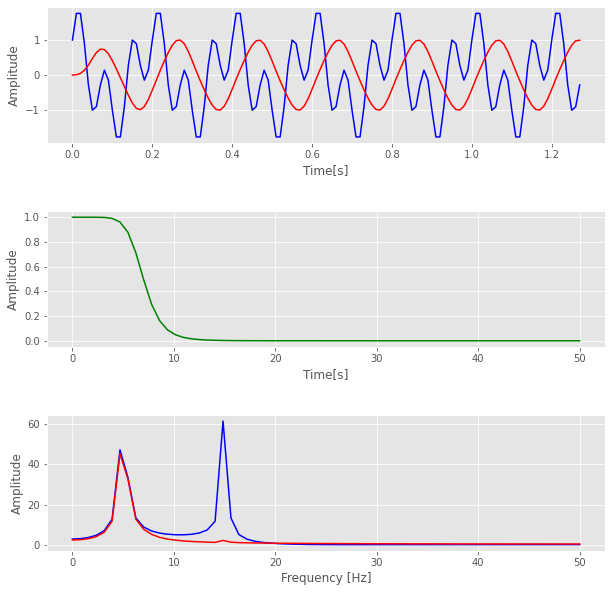

In [53]:
# Parametros de la senal a analizar--------------------------------
npts = 128                              # Numero de puntos
fs = 100                                 # frecuencia de muestreo en Hz
L = npts/fs                                   # Longitud de la senal en segundos
dt=1/fs
fNy = fs / 2.0                          # Frecuencia Nyquist 
f_01 = 5                                  # Frecuencia de la funcion sinusiidal
f_02 = 15
time = np.arange(0,npts/fs,dt)        # verctor de tiempo en segundos
y01  = np.cos(2 * np.pi * f_01 * time)      # Funcion sinusoidal
y02  = np.sin(2 * np.pi * f_02 * time)      # Funcion sinusoidal
y = y01 + y02

# -------------------------Filtro paso bajo -----------------------------------
fc = 7 # cut-off frequency
y_filt = lowpass(y, fc, fs)

# Calcular la tranformada rapida de Fourier --FFT
fw1 = np.fft.rfft(y)              # FFT de senal original
fw2 = np.fft.rfft(y_filt)              # FFT de senal original

ny = 1/(2.*dt)
f = np.linspace(0, ny, len(fw1))    # vector de frecuencias

corners = 4
LP = 1 / ( 1 + (f / fc) ** (2 * corners))
#HP = 1 - 1 / (1 + (f / fc) ** (2 * corners))

fig,(ax0,ax1,ax2) = plt.subplots(3,1,figsize=(10,10))

ax0.plot(time,y,color='blue')
ax0.plot(time,y_filt,color='red')
ax0.set_xlabel('Time[s]')
ax0.set_ylabel('Amplitude')

ax1.plot(f,LP,color='green')
ax1.set_xlabel('Time[s]')
ax1.set_ylabel('Amplitude')


ax2.plot(f,abs(fw1),color='blue')
ax2.plot(f,abs(fw2),color='red')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')

## Ejemplo_02

Text(0, 0.5, 'Amplitude')

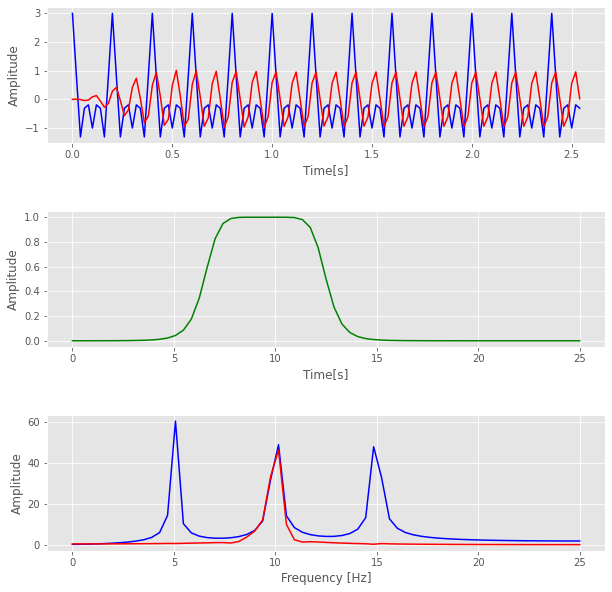

In [52]:
# Parametros de la senal a analizar--------------------------------
npts = 128                              # Numero de puntos
fs = 50                                 # frecuencia de muestreo en Hz
L = npts/fs                                   # Longitud de la senal en segundos
dt=1/fs
fNy = fs / 2.0                          # Frecuencia Nyquist 
f_01 = 5                                  # Frecuencia de la funcion sinusiidal
f_02 = 10
f_03 = 15
time = np.arange(0,npts/fs,dt)        # verctor de tiempo en segundos
y01  = np.cos(2 * np.pi * f_01 * time)      # Funcion sinusoidal
y02  = np.cos(2 * np.pi * f_02 * time)      # Funcion sinusoidal
y03  = np.cos(2 * np.pi * f_03 * time)      # Funcion sinusoidal

y = y01 + y02 + y03

# -------------------------Filtro paso bajo -----------------------------------
freqmin = 8 # 
freqmax = 11 # 
y_filt = bandpass(y, freqmin, freqmax, fs)

# Calcular la tranformada rapida de Fourier --FFT
fw1 = np.fft.rfft(y)              # FFT de senal original
fw2 = np.fft.rfft(y_filt)              # FFT de senal original

ny = 1/(2.*dt)
f = np.linspace(0, ny, len(fw1))    # vector de frecuencias

wc = freqmax - freqmin
wb = 0.5 * wc + freqmin
corners = 4.0
BP = 1/(1 + ((f - wb) / wc) ** (2 * corners))


fig,(ax0,ax1,ax2) = plt.subplots(3,1,figsize=(10,10))

ax0.plot(time,y,color='blue')
ax0.plot(time,y_filt,color='red')
ax0.set_xlabel('Time[s]')
ax0.set_ylabel('Amplitude')

ax1.plot(f,BP,color='green')
ax1.set_xlabel('Time[s]')
ax1.set_ylabel('Amplitude')


ax2.plot(f,abs(fw1),color='blue')
ax2.plot(f,abs(fw2),color='red')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')